In [15]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [38]:
# Loading dataset
df = pd.read_csv(r'C:\Users\AMIT\Downloads\Electric Vehicle Sales by State in India.csv', encoding= 'unicode_escape')


In [42]:
# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Year'].astype(int)
df['Month_Name'] = df['Month_Name'].str.capitalize()
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].astype(int)

In [48]:
df.info

<bound method DataFrame.info of        Year Month_Name       Date                     State  \
0      2014        Jan 2014-01-01            Andhra Pradesh   
1      2014        Jan 2014-01-01            Andhra Pradesh   
2      2014        Jan 2014-01-01            Andhra Pradesh   
3      2014        Jan 2014-01-01            Andhra Pradesh   
4      2014        Jan 2014-01-01            Andhra Pradesh   
...     ...        ...        ...                       ...   
96840  2023        Dec 2023-01-12  Andaman & Nicobar Island   
96841  2023        Dec 2023-01-12  Andaman & Nicobar Island   
96842  2023        Dec 2023-01-12  Andaman & Nicobar Island   
96843  2023        Dec 2023-01-12  Andaman & Nicobar Island   
96844  2023        Dec 2023-01-12  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
0                        ADAPTED VEHICLE           Others       Others   
1                   AGRICULTURAL TRACTOR           Others      

In [58]:
# Basic Exploration
print("Dataset Shape:", df.shape)
print("Years Range:", df['Year'].min(), "to", df['Year'].max())
print("Unique States:", df['State'].nunique())
print(df.head())

Dataset Shape: (96845, 8)
Years Range: 2014 to 2024
Unique States: 34
   Year Month_Name       Date           State         Vehicle_Class  \
0  2014        Jan 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        Jan 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        Jan 2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014        Jan 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        Jan 2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                  0  
1           Others       Others                  0  
2           Others       Others                  0  
3           Others       Others                  0  
4              Bus          Bus                  0  


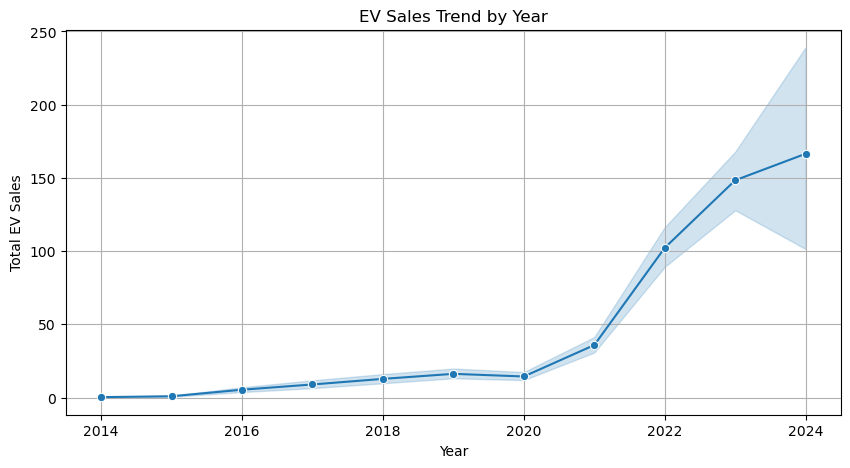

In [82]:
# Sales Trend Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('EV Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

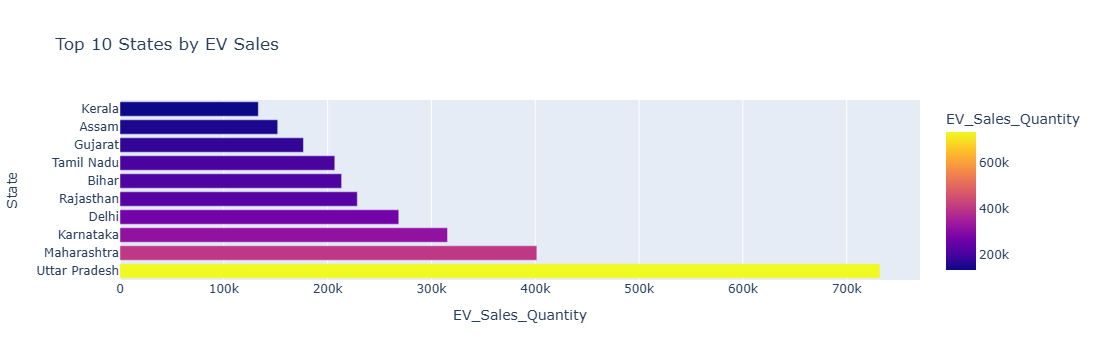

In [146]:
# Interactive Bar Chart: Top 10 States
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_states, x='EV_Sales_Quantity', y='State', orientation='h',
             title='Top 10 States by EV Sales', color='EV_Sales_Quantity', height=500)
fig.show()


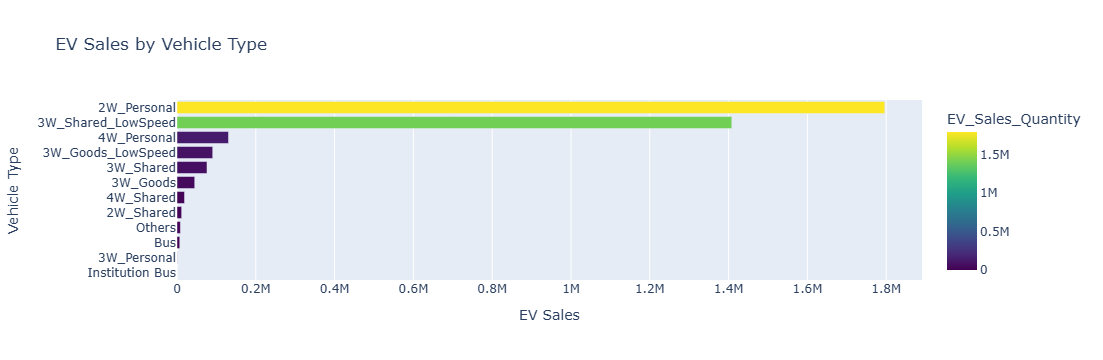

In [170]:
# Vehicle Type Analysis

# Prepare the data
vehicle_type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    vehicle_type_sales,
    x='EV_Sales_Quantity',
    y='Vehicle_Type',
    orientation='h',
    color='EV_Sales_Quantity',
    color_continuous_scale='viridis',  
    title='EV Sales by Vehicle Type'
)

# Customize layout
fig.update_layout(
    xaxis_title='EV Sales',
    yaxis_title='Vehicle Type',
    yaxis=dict(autorange='reversed'),  # Keep highest on top
    height=600
)

fig.show()


In [154]:
#  Year-on-Year Growth
yoy = sales_by_year.copy()
yoy['YoY Growth (%)'] = yoy['EV_Sales_Quantity'].pct_change() * 100
print(yoy)

    Year  EV_Sales_Quantity  YoY Growth (%)
0   2014               2392             NaN
1   2015               7805      226.295987
2   2016              49855      538.757207
3   2017              87420       75.348511
4   2018             130254       48.997941
5   2019             166819       28.072075
6   2020             124684      -25.257914
7   2021             331498      165.870521
8   2022            1024723      209.118909
9   2023            1525179       48.838174
10  2024             143182      -90.612118


In [138]:
#Conclusion
print("""
🔹 EV adoption has been increasing steadily year over year.
🔹 States like Delhi, Karnataka, and Maharashtra are leading in EV sales.
🔹 Two-wheeler and three-wheeler EVs dominate the market.
🔹 Clear seasonality is seen in some months — showing demand peaks.
""")


🔹 EV adoption has been increasing steadily year over year.
🔹 States like Delhi, Karnataka, and Maharashtra are leading in EV sales.
🔹 Two-wheeler and three-wheeler EVs dominate the market.
🔹 Clear seasonality is seen in some months — showing demand peaks.

